In [18]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from pysc2.lib import actions
from pysc2.lib import features

sys.path.append(os.path.abspath('../'))
from features.custom_features import SPATIAL_FEATURES

In [19]:
PROJECT_DIR = os.path.abspath('../')
REPLAY_DIR = os.path.join(PROJECT_DIR, 'sample')
assert all([os.path.isdir(PROJECT_DIR), os.path.isdir(REPLAY_DIR)])

In [20]:
def load_features(replay_dir, feature_type='spatial'):
    """Load parsed features from .npz file format."""
    if feature_type == 'screen':
        filepath = os.path.join(replay_dir, 'ScreenFeatures.npz')
    elif feature_type == 'minimap':
        filepath = os.path.join(replay_dir, 'MinimapFeatures.npz')
    elif feature_type == 'spatial':
        filepath = os.path.join(replay_dir, 'SpatialFeatures.npz')
    elif feature_type == 'flat':
        filepath = os.path.join(replay_dir, 'FlatFeatures.npz')
        raise NotImplementedError
    else:
        raise ValueError
    
    with np.load(filepath) as fp:
        name2feature = {k: v for k, v in fp.items()}
    
    return name2feature

In [21]:
def human_readable_size(size, precision=2):
    suffixes = ['B','KB','MB','GB','TB']
    suffix_idx = 0
    while size > 1024 and suffix_idx < 4:
        suffix_idx += 1     # increment the index of the suffix
        size = size / 1024.0  # apply the division
    return "%.*f%s" % (precision, size, suffixes[suffix_idx])

In [22]:
# Load screen features
screen_specs = features.SCREEN_FEATURES._asdict()
screen_features = load_features(replay_dir=REPLAY_DIR, feature_type='screen')  # dict

print('[Screen features]')
print('=' * 105)
for i, (sc_name, sc_feat) in enumerate(screen_features.items()):
    type_ = str(screen_specs[sc_name].type).split('.')[-1]
    scale_ = screen_specs[sc_name].scale
    print(
        '[{:>02}] Name: {:<21} | Type: {:<11} | Scale: {:>4} | Shape: {} | Size: {}'.format(
            i, sc_name, type_, scale_, sc_feat.shape, human_readable_size(sc_feat.nbytes)
        )
    )

[Screen features]
[00] Name: height_map            | Type: SCALAR      | Scale:  256 | Shape: (1885, 128, 128) | Size: 117.81MB
[01] Name: visibility_map        | Type: CATEGORICAL | Scale:    4 | Shape: (1885, 128, 128) | Size: 117.81MB
[02] Name: creep                 | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[03] Name: power                 | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[04] Name: player_id             | Type: CATEGORICAL | Scale:   17 | Shape: (1885, 128, 128) | Size: 117.81MB
[05] Name: player_relative       | Type: CATEGORICAL | Scale:    5 | Shape: (1885, 128, 128) | Size: 117.81MB
[06] Name: unit_type             | Type: CATEGORICAL | Scale: 1914 | Shape: (1885, 128, 128) | Size: 117.81MB
[07] Name: selected              | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[08] Name: unit_hit_points       | Type: SCALAR      | Scale: 1600 | Shape: (1885, 128, 128) | Size: 1

In [23]:
# Load minimap features
minimap_specs = features.MINIMAP_FEATURES._asdict()
minimap_features = load_features(replay_dir=REPLAY_DIR, feature_type='minimap')  # dict
print('[Minmap features]')
print('=' * 99)
for i, (mn_name, mn_feat) in enumerate(minimap_features.items()):
    type_ = str(minimap_specs[mn_name].type).split('.')[-1]
    scale_ = minimap_specs[mn_name].scale
    print(
        '[{:>02}] Name: {:<15} | Type: {:<11} | Scale: {:>4} | Shape: {} | Size: {}'.format(
            i, mn_name, type_, scale_, mn_feat.shape, human_readable_size(mn_feat.nbytes)
        )
    )

[Minmap features]
[00] Name: height_map      | Type: SCALAR      | Scale:  256 | Shape: (1885, 128, 128) | Size: 117.81MB
[01] Name: visibility_map  | Type: CATEGORICAL | Scale:    4 | Shape: (1885, 128, 128) | Size: 117.81MB
[02] Name: creep           | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[03] Name: camera          | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[04] Name: player_id       | Type: CATEGORICAL | Scale:   17 | Shape: (1885, 128, 128) | Size: 117.81MB
[05] Name: player_relative | Type: CATEGORICAL | Scale:    5 | Shape: (1885, 128, 128) | Size: 117.81MB
[06] Name: selected        | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB


In [24]:
# Load spatial features (minimap features + 'unit_type' channel)
spatial_specs = SPATIAL_FEATURES._asdict()
spatial_features = load_features(REPLAY_DIR, 'spatial')
print('[Spatial features (Customized)]')
print('=' * 102)
for i, (sp_name, sp_feat) in enumerate(spatial_features.items()):
    type_ = str(spatial_specs[sp_name].type).split('.')[-1]
    scale_ = spatial_specs[sp_name].scale
    print(
        '[{:>02}] Name: {:<15} | Type: {:<11} | Scale: {:>4} | Shape: {} | Size: {}'.format(
            i, sp_name, type_, scale_, sp_feat.shape, human_readable_size(sp_feat.nbytes)
        )
    )

[Spatial features (Customized)]
[00] Name: height_map      | Type: SCALAR      | Scale:  256 | Shape: (1885, 128, 128) | Size: 117.81MB
[01] Name: visibility_map  | Type: CATEGORICAL | Scale:    4 | Shape: (1885, 128, 128) | Size: 117.81MB
[02] Name: creep           | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[03] Name: camera          | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[04] Name: player_id       | Type: CATEGORICAL | Scale:   17 | Shape: (1885, 128, 128) | Size: 117.81MB
[05] Name: player_relative | Type: CATEGORICAL | Scale:    5 | Shape: (1885, 128, 128) | Size: 117.81MB
[06] Name: selected        | Type: CATEGORICAL | Scale:    2 | Shape: (1885, 128, 128) | Size: 117.81MB
[07] Name: unit_type       | Type: CATEGORICAL | Scale: 1914 | Shape: (1885, 128, 128) | Size: 117.81MB


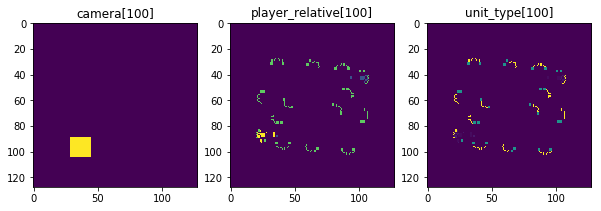

In [31]:
idx = 100
features = ['camera', 'player_relative', 'unit_type']
fig, axes = plt.subplots(1, len(features), figsize=(10, 6))
for i, feat in enumerate(features):
    axes[i].imshow(spatial_features[feat][idx])
    axes[i].set_title(f"{feat}[{idx}]")
plt.show(fig)    